**A simple model for targeting industrial investments with subsidies and taxes**

by

Dmitry B. Rokhlin and Gennady A. Ougolnitsky

Code for Section 6.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

The price of raw materials $p_m$, the price of labor $p$, and the price of water $p_w$

$$ p_m=100 \ \mathrm{PKR/kg},\quad p=1400\ \mathrm{PKR/hr},\quad p_w=30\ \mathrm{PKR/l}. $$

In [2]:
p_m=100
p_w=30
p=1400

Parameters of the Cobb-Douglas function

In [3]:
mu=0.3568
nu=0.0542
A_calligr=3212.468

In [4]:
A=A_calligr*p_w/(p_m**nu)

$$\ell_1=\left(A \nu^\nu\right)^{1/(1-\nu-\mu)}\left(\frac{\mu}{p}\right)^{\mu/(1-\nu-\mu)} \left(\frac{\mu}{1-\nu}\right)^{\mu/(1-\nu-\mu)},$$
$$\ell_2=(A\nu^\nu)^{1/(1-\nu-\mu)}\left(\frac{\mu}{p}\right)^{\mu/(1-\mu-\nu)}\left(\frac{1-\nu}{\mu}\right)^{\nu/(1-\nu-\mu)}.$$

In [5]:
def l_1(A=A_calligr*p_w/(p_m**nu)):
    return (A*nu**nu)**(1/(1-nu-mu))*(mu/p)**(mu/(1-nu-mu))*(mu/(1-nu))**(mu/(1-nu-mu))
def l_2(A=A_calligr*p_w/(p_m**nu)):
    return (A*nu**nu)**(1/(1-nu-mu))*(mu/p)**(mu/(1-nu-mu))*((1-nu)/mu)**(nu/(1-nu-mu))
l_1(), l_2(), l_1()/p_w, l_2()/p_w

(534266.6893016717, 1054838.0310734864, 17808.889643389055, 35161.26770244955)

$$w_1:=\ell_1/p_w,\quad w_2:=\ell_2/p_w$$

In [6]:
Latex(f'$w_1$={l_1()/p_w:.0f}')

<IPython.core.display.Latex object>

In [7]:
Latex(f'$w_2$={l_2()/p_w:.0f}')

<IPython.core.display.Latex object>

Fair industrial investment level

$$ x^\circ=\left(\frac{1}{\varkappa}\right)^{(\mu+\nu)/(1-\mu-\nu)}(A\nu^\nu)^{1/(1-\mu-\nu)}\left(\frac{\mu}{p}\right)^{\mu/(1-\mu-\nu)}.    
$$

Fair production level 

$$w^\circ=x^\circ/p_w=\left(\mathcal A\left(\frac{\nu}{p_m}\right)^\nu\right)^{1/(1-\mu-\nu)}\left(\frac{\mu}{p}\right)^{\mu/(1-\mu-\nu)}\left(\frac{p_w}{\varkappa}\right)^{(\mu+\nu)/(1-\mu-\nu)}$$.

In [8]:
kappa=nu*((1-nu)/mu)**(mu/(mu+nu))+(1-nu)*(mu/(1-nu))**(nu/(nu+mu))
kappa

0.9580417209901357

In [9]:
x_circ=(1/kappa)**((mu+nu)/(1-mu-nu))*(mu/p)**(mu/(1-mu-nu))*(A_calligr*(nu/p_m)**nu)**(1/(1-mu-nu))\
*p_w**(1/(1-mu-nu))
w_circ=x_circ/p_w
Latex(f'$w^\circ$={w_circ:.0f}')

<IPython.core.display.Latex object>

$$ g^*=\begin{cases}
(1-\nu)\left(\left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/\mu}\displaystyle\frac{p}{\mu}\underline x^{(1-\nu)/\mu}-\underline x\right) ,& \underline x\le\ell_1,\\
\varkappa(\mu,\nu)\left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/(\mu+\nu)}\left(\displaystyle\frac{p}{\mu}\right)^{\mu/(\mu+\nu)}\underline x^{1/(\mu+\nu)}-\underline x, & \ell_1\le \underline x\le\ell_2,\\
\nu\left(\left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/\nu} \left(\displaystyle\frac{p}{\mu}\right)^{\mu/\nu}\underline x^{(1-\mu)/\nu}-\underline x \right), &\ell_2\le \underline x,
\end{cases} $$

$$\varkappa(\mu,\nu)=\nu\left(\frac{1-\nu}{\mu}\right)^{\mu/(\mu+\nu)}+(1-\nu)\left(\frac{\mu}{1-\nu}\right)^{\nu/(\mu+\nu)}. $$

In [10]:
def g_star(x,A=A_calligr*p_w/(p_m**nu)):
    if x<=l_1(A):
        v=(1-nu)*((1/(A*nu**nu))**(1/mu)*p/mu*x**((1-nu)/mu)-x)
    elif l_1(A)<x<=l_2(A):
        v=kappa*(1/(A*nu**nu))**(1/(mu+nu))*(p/mu)**(mu/(mu+nu))*x**(1/(mu+nu))-x
    elif l_2(A)<x:
        v=nu*((1/(A*nu**nu))**(1/nu)*(p/mu)**(mu/nu)*x**((1-mu)/nu)-x)
    return v

In [11]:
g_star(l_1()), g_star(l_2())

(-314683.07999868476, 94379.03121183673)

$$ f^* =\begin{cases}
   (1-\mu-\nu)\displaystyle\left(\frac{1}{A\nu^\nu}\right)^{1/\mu}\frac{p}{\mu}\underline x^{(1-\nu)/\mu} , & \underline x\le\ell_1,\\
    (1-\mu-\nu)\left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/(\mu+\nu)}\left(\displaystyle\frac{p}{\mu}\right)^{\mu/(\mu+\nu)} \left(\displaystyle\frac{\mu}{1-\nu}\right)^{\nu/(\mu+\nu)}\underline x^{1/(\mu+\nu)}, & \ell_1\le\underline x\le\ell_2,\\
    (1-\mu-\nu)\underline x, & \ell_2\le\underline x.
  \end{cases}  $$

In [12]:
def f_star(x,A=A_calligr*p_w/(p_m**nu)):
    if x<=l_1(A):
        v=(1-mu-nu)*(1/(A*nu**nu))**(1/mu)*p/mu*x**((1-nu)/mu)
    elif l_1(A)<x<=l_2(A):
        v=(1-mu-nu)*(1/(A*nu**nu))**(1/(mu+nu))*(p/mu)**(mu/(mu+nu))*(mu/(1-nu))**(nu/(mu+nu))*x**(1/(mu+nu))
    elif l_2(A)<x:
        v=(1-mu-nu)*x
    return v    

In [13]:
f_star(l_1())

118713.17714477755

$$\sigma^*=\begin{cases}
1-\left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/\mu}\displaystyle\frac{p}{\mu}\underline x^{(1-\nu-\mu)/\mu}, & \underline x\le\ell_1,\\
1-\left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/(\mu+\nu)}\left(\displaystyle\frac{p}{\mu}\right)^{\mu/(\mu+\nu)}\left(\displaystyle\frac{\mu}{1-\nu}\right)^{\nu/(\mu+\nu)}\underline x^{(1-\mu-\nu)/(\mu+\nu)}, & \ell_1\le \underline x\le\ell_2,\\
0, & \ell_2\le \underline x,
\end{cases}$$

In [14]:
def sigma_star(x,A=A_calligr*p_w/(p_m**nu)):
    if x<=l_1(A):
        v=1-(1/(A*nu**nu))**(1/mu)*p/mu*x**((1-nu-mu)/mu)
    elif l_1(A)<x<=l_2(A):
        v=1-(1/(A*nu**nu))**(1/(mu+nu))*(p/mu)**(mu/(mu+nu))*(mu/(1-nu))**(nu/(mu+nu))*x**((1-mu-nu)/(mu+nu))
    elif l_2(A)<x:
        v=0
    return v    

In [15]:
Latex(f'$\sigma^*(x^\circ)$={sigma_star(x_circ):.2f}')

<IPython.core.display.Latex object>

$$ \delta^*=\begin{cases}
0, & \underline x\le\ell_1,\\
\displaystyle\frac{1-\nu}{\mu}-1, & \ell_1<\underline x\le\ell_2,\\
\left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/\nu}
\left(\displaystyle\frac{p}{\mu}\right)^{\mu/\nu}\underline x^{(1-\mu-\nu)/\nu}-1,  & \ell_2\le \underline x,
\end{cases}
$$

In [16]:
def delta_star(x,A=A_calligr*p_w/(p_m**nu)):
    if x<=l_1(A):
        v=0
    elif l_1(A)<x<=l_2(A):
        v=(1-nu)/mu-1
    elif l_2(A)<x:
        v=(1/(A*nu**nu))**(1/nu)*(p/mu)**(mu/nu)*x**((1-mu-nu)/nu)-1
    return v    

In [17]:
Latex(f'$\delta^*(x^\circ)$={(1-nu)/mu-1:.2f}')

<IPython.core.display.Latex object>

$$ \beta^*=\begin{cases}
    1-\nu, & \underline x\le \ell_1\\
    1, & \underline x>\ell_1,
\end{cases} $$
$$ \gamma^*=\begin{cases}
    0, & \underline x\le\ell_1\\
    \displaystyle\frac{\nu}{1-\nu}, & \underline x>\ell_1,
\end{cases} $$

In [18]:
def beta_star(x):
    if x<=l_1(A):
        return 1-nu
    else:
        return 1
    
def gamma_star(x):
    if x<=l_1(A):
        return 0
    else:
        return nu/(1-nu)    

$$ L^* =\begin{cases}
    \left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/\mu}\underline x^{(1-\nu)/\mu}, & \underline x\le\ell_1,\\
    \left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/(\mu+\nu)}\left(\displaystyle\frac{\mu}{p}\right)^{\nu/(\mu+\nu)} \left(\displaystyle\frac{\mu}{1-\nu}\right)^{\nu/(\mu+\nu)}\underline x^{1/(\mu+\nu)}, & \ell_1\le\underline x\le\ell_2,\\
    \displaystyle\frac{\mu}{p}\underline x, & \ell_2\le\underline x.
\end{cases}$$

In [19]:
def L_star(x,A=A_calligr*p_w/(p_m**nu)):
    if x<=l_1(A):
        v=(1/(A*nu**nu))**(1/mu)*x**((1-nu)/mu)
    elif l_1(A)<x<=l_2(A):
        v=(1/(A*nu**nu))**(1/(mu+nu))*(mu/p)**(nu/(nu+mu))*(mu/(1-nu))**(nu/(mu+nu))*x**(1/(mu+nu))
    elif l_2(A)<x:
        v=mu/p*x
    return v    

In [20]:
l_1()<x_circ<l_2()

True

In [21]:
Latex(f'$L^*(x^\circ)$={L_star(x_circ):.0f}')

<IPython.core.display.Latex object>

In [22]:
cost=[]
revenue=[]
sigma=[]
delta=[]
beta=[]
gamma=[]
L=[]
x_w=[]
N=1000
for x in np.linspace(0,1.05*l_2(),N):
    x_w.append(x/p_w)
    cost.append(g_star(x))
    revenue.append(f_star(x))
    sigma.append(sigma_star(x))
    if np.abs(x-l_1())/N<1:
        delta.append(np.nan)
    else:
        delta.append(delta_star(x)) 
    beta.append(beta_star(x))
    gamma.append(gamma_star(x))
    L.append(L_star(x))

In [23]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
plt.rc('text', usetex=True)

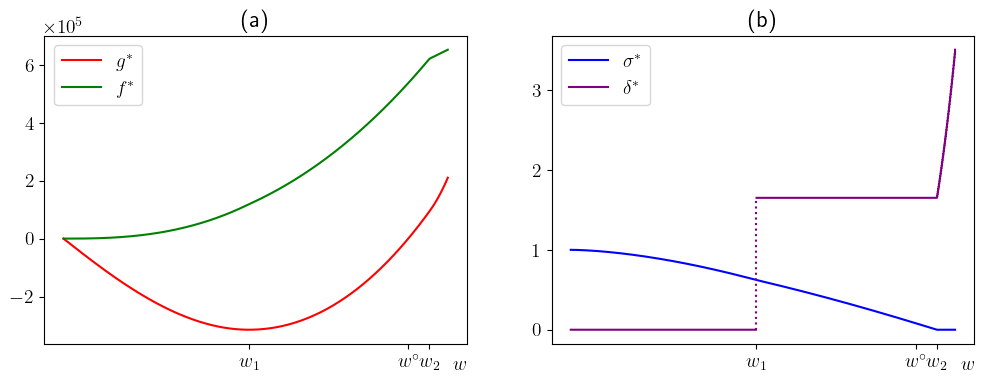

In [24]:
x_circ=(1/kappa)**((mu+nu)/(1-mu-nu))*(mu/p)**(mu/(1-mu-nu))*(A_calligr*(nu/p_m)**nu)**(1/(1-mu-nu))*p_w**(1/(1-mu-nu))
ell_w=[l_1()/p_w,x_circ/p_w,l_2()/p_w]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axes[0].plot(x_w,cost,c='r',label=r'$g^*$');
axes[0].plot(x_w,revenue,c='g',label=r'$f^*$');
axes[0].set_xticks(ell_w)
axes[0].set_xticklabels(['$w_1$','$w^\circ$','$w_2$'])
axes[0].set_xlabel(r'$w$',loc='right',labelpad=-10)
axes[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axes[0].set_title('(a)')
axes[0].legend()
axes[1].plot(x_w,sigma,c='b',label=r'$\sigma^*$');
axes[1].plot(x_w,delta,c='purple',label=r'$\delta^*$',drawstyle='steps-post');
axes[1].set_xticks(ell_w)
axes[1].set_xticklabels(['$w_1$','$w^\circ$','$w_2$'])
axes[1].set_xlabel(r'$w$',loc='right',labelpad=-10)
axes[1].vlines(l_1()/p_w,0,(1-nu)/mu-1,ls=':',colors='purple')
axes[1].set_title('(b)')
axes[1].legend();

In [25]:
fig.savefig("Fig_2.pdf", dpi=400)

The dependence of $P^*(x^\circ$), $L^*(x^\circ)$, $M^*(x^\circ)$ on the  water price $p_w$ in range $[25,40]$.

In [26]:
production=[]
water_price=[]
labor=[]
raw_materials=[]
for w_price in np.arange(25,41,1):
    w_circ=(1/kappa)**((mu+nu)/(1-mu-nu))*(mu/p)**(mu/(1-mu-nu))*(A_calligr*(nu/p_m)**nu)**(1/(1-mu-nu))\
    *w_price**((mu+nu)/(1-mu-nu))
   # x_circ=w_circ*w_price
    x_circ=(1/kappa)**((mu+nu)/(1-mu-nu))*(mu/p)**(mu/(1-mu-nu))*(A_calligr*(nu/p_m)**nu)**(1/(1-mu-nu))*w_price**(1/(1-mu-nu))
    production.append(w_circ)
    labor.append(L_star(x_circ,A_calligr*w_price/(p_m**nu)))
    water_price.append(w_price)
    raw_materials.append((1-sigma_star(x_circ,A_calligr*w_price/(p_m**nu)))*(1+delta_star(x_circ,A_calligr*w_price/(p_m**nu)))\
                         *nu*x_circ/p_m)
    print(w_price,production[-1],labor[-1],raw_materials[-1],A_calligr*labor[-1]**mu*raw_materials[-1]**nu)

25 29163.73591629433 170.55469920583639 961.4808313036223 29163.735916294318
26 29972.909311546224 182.29836425937228 1027.6842774168126 29972.909311546213
27 30772.729209539124 194.36152748985276 1095.6888546287012 30772.729209539102
28 31563.64442120087 206.74056448100467 1165.4741307448794 31563.644421200865
29 32346.067030936334 219.43202162416281 1237.020636477513 32346.067030936312
30 33120.37656013853 232.43260238036996 1310.3097879996435 33120.376560138524
31 33886.92353608581 245.73915507423465 1385.323818134585 33886.923536085786
32 34646.03256753601 259.34866200426274 1462.045714966778 34646.03256753599
33 35398.005008447755 273.25822969048124 1540.459166863984 35398.00500844773
34 36143.121275762285 287.4650801093291 1620.548513065081 36143.12127576225
35 36881.64287500021 301.9665427894473 1702.2986991210587 36881.64287500019
36 37613.81417778105 316.76004766136884 1785.6952365860466 37613.81417778104
37 38339.86398767739 331.84311857004275 1870.7241664449725 38339.8639876

In [27]:
import pandas as pd
columns={'water price':water_price,'production':production,'labor':labor,'raw materials':raw_materials}
table=pd.DataFrame(columns).set_index('water price')
table

,production,labor,raw materials
water price,,,
25,29163.735916,170.554699,961.480831
26,29972.909312,182.298364,1027.684277
27,30772.729210,194.361527,1095.688855
28,31563.644421,206.740564,1165.474131
29,32346.067031,219.432022,1237.020636
30,33120.376560,232.432602,1310.309788
31,33886.923536,245.739155,1385.323818
32,34646.032568,259.348662,1462.045715
33,35398.005008,273.258230,1540.459167


Data from the paper

Muhammad, S., Hanan, F., Shah, S. A., Yuan, A., Khan, W.,  Sun, H. Industrial optimization using three-factor Cobb-Douglas production function of non-linear programming with application. *AIMS Mathematics* **2023**, *8(12)*, 29956-29974.

In [28]:
true_prod_levels=[36.000,34.000,36.700,37.000,35.700,36.400,33.600,35.500,36.875,37.000,33.600,36.500]
np.mean(true_prod_levels), np.std(true_prod_levels)

(35.739583333333336, 1.2487267821220494)

In [29]:
true_labor_levels=[300,272,315,330,278.5,321,269,308,338,321,266,336]
np.mean(true_labor_levels), np.std(true_labor_levels)

(304.5416666666667, 25.70137669248262)

In [30]:
true_raw_materials=[900,833,924,942,874,922,860,950,957,914,875,890]
np.mean(true_raw_materials), np.std(true_raw_materials)

(903.4166666666666, 36.65028042942585)

In [31]:
# Checking the result from Muhammad et al.
A_calligr*323.7554**mu*688.4982**nu

35999.67463000339